# 2020 Kaggle Machine Learning & Data Science Survey

* [Problem Definition](#problem-definition)
* [Libraries](#libraries)
* [Data Analysis](#data-analysis)
* [Preliminarily dependencies analyzing in QlikView](#preliminarily-dependencies-analyzing-in-qlikview)


## Problem Definition

    In this challenge, we are asked to tell a data story about a subset of the data science community represented in this survey.

    The challenge is to deeply explore (through data) the impact, priorities, or concerns of a specific group of data science and machine learning practitioners. 

## Libraries


In [ ]:
import os
import pandas as pd
import missingno as missingno
import matplotlib.pyplot as plt
from IPython.display import Image

# Data analysis

In [ ]:
data = pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv", sep=",", low_memory=False)
data.head(10)

    With help of function 'shape' it was discovered that there are 20036 participants of the survey. There are 355 columns of useful data. In the first row the used questions are written.

In [ ]:
data[1:].shape

    All parameters(columns) are not numerical.

In [ ]:
data.info()

In [ ]:
data.columns

    By using the code below we can simply look at the data with null (NA) values.

In [ ]:
clean_data = data[1:]
if len(clean_data[clean_data.isnull().any(axis=1)] != 0):
    missingno.matrix(clean_data)
    plt.show()

    Checking the dublicates.

In [ ]:
clean_data[clean_data.duplicated(keep=False)]

In [ ]:
if len(clean_data[clean_data.duplicated()]) > 0:
    print("The number of dubplicates ", len(clean_data[clean_data.duplicated()]))
    print(clean_data[clean_data.duplicated(keep=False)].sort_values(by=list(clean_data.columns)).head())
else:
    print("No dublicates.")

# Preliminarily dependencies analyzing in QlikView

    The main factors influencing the income (compensation) of the survey participants were analyzed. The comparison involved Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q15, Q20, and Q25. Before the comparison, the lines that do not specify the participant's income were filtered out. Also, columns are created which are showing the number of known languages (the "Other" field is considered as one language) and "average" income. It is important to note that since each participant specifies an approximate range in which their income lies, and not a specific value, the average income's calculations use the value that lies in the middle of the selected range. Therefore, large errors may occur in the analysis. This is especially noticeable in the extreme ranges.

The code below is written in R. 

In [ ]:
'''
library(dplyr)

D = read.csv("kaggle_survey_2020_responses.csv", header = TRUE, sep = ",")
D = D[2:20037,]

D1 = select(D, matches("Q(15|20|24|25|[1-6]|(7.*))\\b", perl=TRUE))
D2 = subset(D1, D$Q24 != "")

D2$Q24S="0"
D2 = mutate(D2, Q24S = case_when(  D2$Q24 == "$0-999"          ~ "500", D2$Q24 == "1,000-1,999"     ~ "1500",  D2$Q24 == "4,000-4,999"     ~ "4500",  D2$Q24 == "7,500-9,999"     ~ "8750",  D2$Q24 == "10,000-14,999"   ~ "12500",  D2$Q24 == "15,000-19,999"   ~ "17500",  D2$Q24 == "20,000-24,999"   ~ "22500",  D2$Q24 == "25,000-29,999"   ~ "27500",  D2$Q24 == "30,000-39,999"   ~ "35000",  D2$Q24 == "40,000-49,999"   ~ "45000",  D2$Q24 == "50,000-59,999"   ~ "55000",  D2$Q24 == "60,000-69,999"   ~ "65000",  D2$Q24 == "70,000-79,999"   ~ "75000",  D2$Q24 == "80,000-89,999"   ~ "85000",  D2$Q24 == "90,000-99,999"   ~ "95000",  D2$Q24 == "100,000-124,999" ~ "112500",  D2$Q24 == "100,000-124,999" ~ "112500",  D2$Q24 == "125,000-149,999" ~ "137500",  D2$Q24 == "150,000-199,999" ~ "175000",  D2$Q24 == "200,000-249,999" ~ "225000",  D2$Q24 == "250,000-299,999" ~ "275000",  D2$Q24 == "300,000-500,000" ~ "400000",  D2$Q24 == "> $500,000"      ~ "500000"))
D2 = mutate(D2, Q25S = case_when(  D2$Q25 == "$0 ($USD)"          ~ "0", D2$Q25 == "$1-$99"     ~ "50",  D2$Q25 == "$100-$999"     ~ "500",  D2$Q25 == "$1000-$9,999"     ~ "5000",  D2$Q25 == "$10,000-$99,999"   ~ "50000",  D2$Q25 == "$100,000 or more ($USD)"   ~ "100000"))

D2$Q7N = as.numeric(D2$Q7_Part_1 != "") + as.numeric(D2$Q7_Part_2 != "") + as.numeric(D2$Q7_Part_3 != "") + as.numeric(D2$Q7_Part_4 != "") + as.numeric(D2$Q7_Part_5 != "") + as.numeric(D2$Q7_Part_6 != "") + as.numeric(D2$Q7_Part_7 != "") +as.numeric(D2$Q7_Part_8 != "") + as.numeric(D2$Q7_Part_9 != "") + as.numeric(D2$Q7_Part_10 != "") + as.numeric(D2$Q7_Part_11 != "") + as.numeric(D2$Q7_Part_12 != "") + as.numeric(D2$Q7_OTHER != "")

write.csv(D2, "responses_cut.csv", quote=TRUE)
'''

    An environment has been created that allows you to easily view the distribution of income under a given set of conditions.

In [ ]:
Image(filename="../input/diagrams/1.png")

    The dependence of income on age is expected: the income grows when a person reaches the age of 55-59 years old, then the income goes down (apparently, there are few pensioners in Data Science).

In [ ]:
Image(filename="../input/diagrams/2.png")

    People over the age of 70 have created a separate interesting example. The overall distribution is not very encouraging.

In [ ]:
Image(filename="../input/diagrams/3.png")

    In particular, Python has roughly the same distribution.

In [ ]:
Image(filename="../input/diagrams/4.png")

    People over 70 who know R have a higher income on average.

In [ ]:
Image(filename="../input/diagrams/5.png")

    The effect of gender on income is also an interesting example. The correlation between the average income of men and women corresponds to the average difference in income in other fields of activity in the United States, while the "non-binary" on average earn much more.

In [ ]:
Image(filename="../input/diagrams/6.png")

    In the US, the difference in income is decreasing.

In [ ]:
Image(filename="../input/diagrams/7.png")

    Comparison by gender for each age:

In [ ]:
Image(filename="../input/diagrams/8.png")

    In Russia, Ukraine and Belarus, "non-binary" ones are paid lower on average.

In [ ]:
Image(filename="../input/diagrams/9.png")

In [ ]:
Image(filename="../input/diagrams/10.png")

    On average, people who do not graduate from university earn even more than bachelors. But the income of masters is already higher, and a doctorate increases the advantage (who would have thought).

In [ ]:
Image(filename="../input/diagrams/11.png")

    In Russia, you cannot go anywhere without education: the average income is constantly increasing.

In [ ]:
Image(filename="../input/diagrams/12.png")

    Below there is the dependence of income on the role/specialty:

In [ ]:
Image(filename="../input/diagrams/13.png")

    Interestingly, for Russia, ML Engineer is paid much higher than the rest (apparently, due to the fact that this direction is only developing in Russia), and only one statistician participated in the survey.

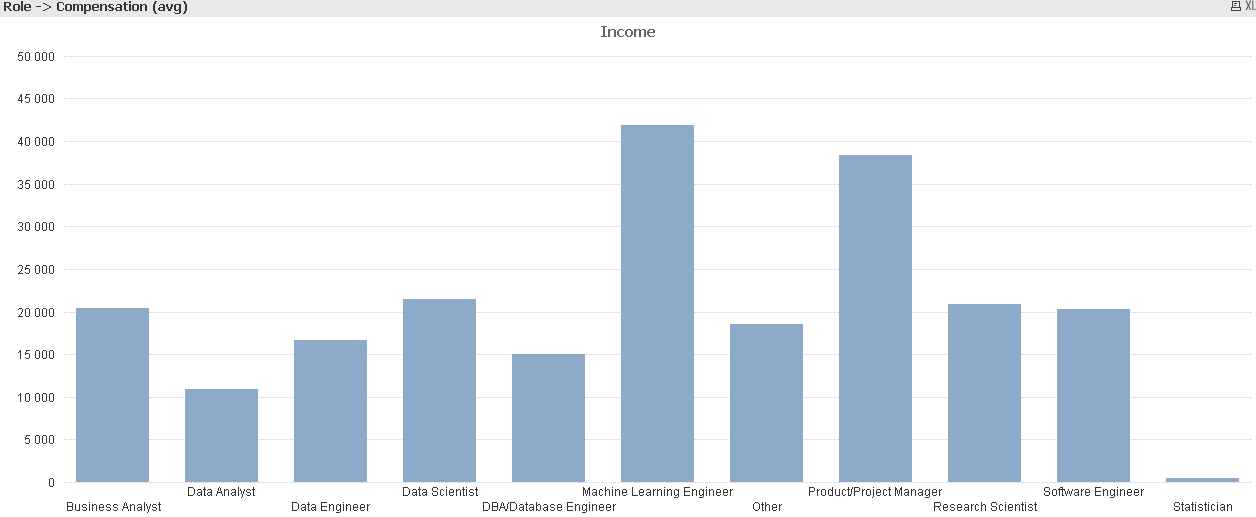

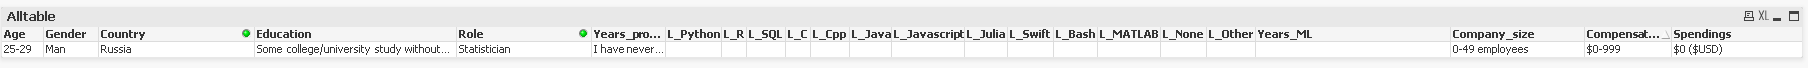

    In the US, by the way, Product Manager are not needed as much, and salaries are distributed more evenly.

In [ ]:
Image(filename="../input/diagrams/15.png")

    In part, these values can be justified by the characteristics of the sample. The following diagram shows that Statistician and Data Engineer are the rarest majors, while ML Engineers are the most.

In [ ]:
Image(filename="../input/diagrams/16.png")

    An interesting example is the dependence of income on the experience of specialists in programming and machine learning.  It can be seen that up to 3-5 years in programming, almost nothing depends on experience, but then a stable salary growth begins. In addition, with experience in programming, the influence of experience in using machine learning methods increases, which is clearly noticeable for "5-10 years".

    Who are the people who have no experience in programming, but have used machine learning for more than 20 years?

In [ ]:
Image(filename="../input/diagrams/17.png")

    In most countries, there is an increase in employee's income depending on the size of the company.

In [ ]:
Image(filename="../input/diagrams/18.png")

    Except for Russia. Medium-sized companies pay even less than the smallest ones.

In [ ]:
Image(filename="../input/diagrams/19.png")

    When comparing the size of the company and the popular specialties, interesting facts were revealed.
    
    So, Data Engineer is less in demand in large companies than in medium-sized ones, but Research Scientist - on the contrary. Most of all, the growth is noticeable in Statistician - with the growth of the company, their average salaries change from the smallest to the largest.

In [ ]:
Image(filename="../input/diagrams/20.png")

    What is happening in Russia is difficult to describe. Most likely, this variation is associated with a relatively small sample size and the novelty of the direction as a whole.

In [ ]:
Image(filename="../input/diagrams/21.png")

    Then the average expenses of the participants were analyzed. For example, large companies do not always provide employees with tools and often they have to get them "at their own expense".

In [ ]:
Image(filename="../input/diagrams/22.png")

    With the increase in expenses, there is also an increase in income. But how big is the difference? It is impossible to say for sure, since only ranges are specified for both values and it is impossible to accurately calculate the difference. But even so, it is clear that most of the income is spent on tools. Thus, expensive software and hardware does not always lead to a sharp increase in profits.

In [ ]:
Image(filename="../input/diagrams/23.png")

    Quite a bit depends on the number of languages known to employees. The last 2 values are outliers.

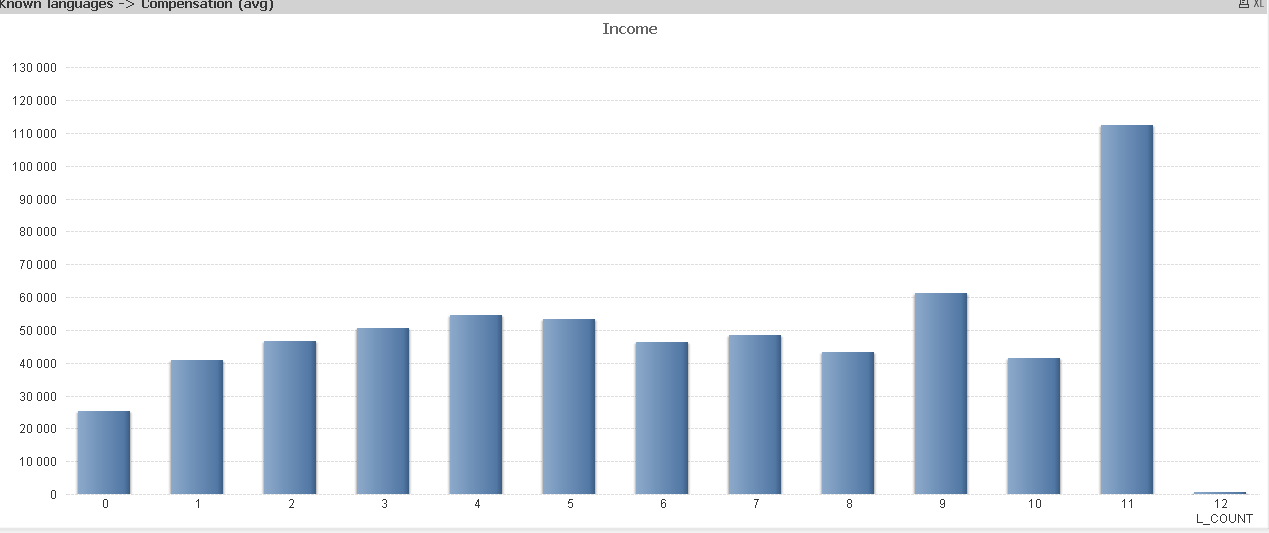
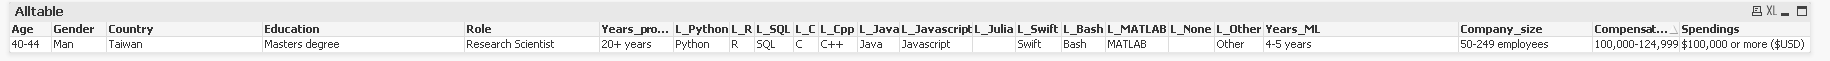
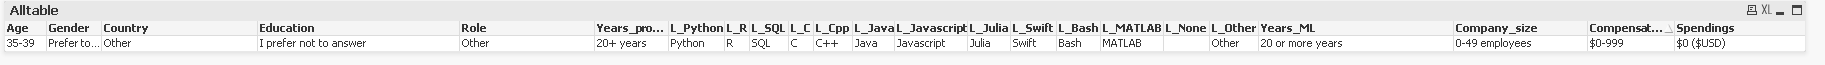

    Let's consider the main languages. It is clearly seen that there are Python specialists at most. But the distribution of salaries is no better than in other languages - the "0-999" column, just like in other languages, includes most of the results.

In [ ]:
Image(filename="../input/diagrams/25.png")

    Let's exclude Python for clarity.

In [ ]:
Image(filename="../input/diagrams/26.png")

    The R curve generally follows the shape of the curve for Python. Programmers who know SQL are in demand a little more, and C-on the contrary. Same with Java/Javascript. All these languages are quite popular, so there is no high demand for them.

    Julia language stands out very strongly against the general background. Because of the novelty and comparative rarity of the language, specialists who know it are more likely to receive high salaries.

In [ ]:
Image(filename="../input/diagrams/27.png")

    The same situation with Swift language.

In [ ]:
Image(filename="../input/diagrams/28.png")

    The popularity of Bash seems unexpected at first glance. But often specialists who know Bash have a higher knowledge of the Linux architecture, and therefore use its resources more efficiently.

In [ ]:
Image(filename="../input/diagrams/29.png")

    MATLAB repeats the curve of popular languages.

In [ ]:
Image(filename="../input/diagrams/30.png")

    It is interesting that even people who do not know any language are in demand. Many of them belong to the Business/Data Analyst specialty, and most have completely different roles that are not represented in the survey.

In [ ]:
Image(filename="../input/diagrams/31.png")